In [39]:

####################################### Reinforcement Learning: Stochastic  Case #################################################################
import numpy as np
import random
import matplotlib.pyplot as plt
from random import randint


def get_initial_boardState():
    qTable = {}
    
    for i in range (0,12):
        qTable[i] = [0,0,0,0]   # Four Values represent UP, DOWN, LEFT , RIGHT RESPECTIVELY
    
    # 0 - UP, 1- DOWN, 2-LEFT, 3-RIGHT
    #Defining the restrictions of the action on the boundary states accroding to the board, giving them the value as -1
   
    qTable[0][0] = -1
    qTable[0][2] = -1
    
    qTable[1][0] = -1
    
    qTable[2][0] = -1
    
    qTable[3][0] = -1
    qTable[3][3] = -1
    
    qTable[4][2] = -1
    
    # Since s6 is our goal State --- here indexed at 5 as we are using the zero indexed problems
    qTable[5][0] = -1
    qTable[5][1] = -1
    qTable[5][2] = -1
    qTable[5][3] = -1

    
    
    qTable[7][3] = -1
    
    qTable[8][1] = -1
    qTable[8][2] = -1
    
    qTable[9][1] = -1
    
    qTable[10][1] = -1
    
    qTable[11][1] = -1
    qTable[11][3] = -1
    print 'Initial State'
    print_board(qTable)
    return qTable
    

# Print Board Values
def print_board(qTable):
    for i in range(0,12):
        print 's' + str(i+1), qTable[i]

def Get_Random_Move(movesCnt):
    return randint(0,movesCnt);

def Get_Random_State(statesCnt):
    return randint(0,statesCnt)

def get_probablistic_action(qTable, source_state, intended_action):
    num_possible_moves = 0
    nonintendedprob = 0.0
    possibleStates = []
    
    for i in range(0,4):
        if qTable[source_state][i] != -1 and i != intended_action:
            possibleStates.append(i)
            num_possible_moves += 1
    
    probability = random.uniform(0, 1)
    
    if probability <= 0.7:
        return intended_action
    else:
        if num_possible_moves == 1:
            return possibleStates[0]
        elif num_possible_moves == 2:
            if probability <= 0.85:
                return possibleStates[0]
            else:
                return possibleStates[1]
        elif num_possible_moves == 3:
            if probability <= 0.80:
                return possibleStates[0]
            elif probability <=0.9:
                return possibleStates[1]
            else:
                return possibleStates[2]
        else:
            print 'Error Occured Check your Code'
            
            

def Get_target_state(Current_State, move):
    map_move = {
        0 : -4,
        1 : +4,
        2 : -1,
        3 : +1,
    }
    return Current_State + map_move[move]
    
    
def q_Learning(qTable, gamma):
    
    visits_count = [[0 for x in range(4)] for y in range(12)] 
    expected_reward = [[0 for x in range(4)] for y in range(12)] 
    
    states_Cnt = 11 # 0 indexed
    moves_Cnt = 3   # 0 indexed
    
    intended_move = 0
    probablistic_move = 0
    alpha = 0.0
    
    current_diff = 0
    prev_diff = 0
    prev_QTableSum = 0
    currentQTableSum = 0
    breakingCounter = 0
    first_Move = True
    
    goal_state = 5
    num_iterations =0
    source_state = 0
    target_state = 0
    inGoalState = True
    
    #PLot Data
    plot_data = []
    
    while True:
        num_iterations += 1
        
        #Compute the Q-Value by randomly selecting the state action move
        maxQval = -1
        reward = 0        
        
        if inGoalState or source_state == goal_state:
            source_state = Get_Random_State(states_Cnt)
        else:
            if not first_Move:
                source_state = target_state
        
        # Make the random Move
        intended_move = Get_Random_Move(moves_Cnt)
        
        if(qTable[source_state][intended_move] == -1):
            continue
        
        #Find the probabilistic Move
        probablistic_move = get_probablistic_action(qTable, source_state, intended_move)
            
        #Check the move is valid or not
        
        if(qTable[source_state][probablistic_move] != -1):
            first_Move = False
            target_state = Get_target_state(source_state , probablistic_move)

            for i in range(0,4):
                if qTable[target_state][i] > maxQval:
                    maxQval = qTable[target_state][i]
            
            if target_state == goal_state:
                reward = 100
                inGoalState = True
                first_Move = True
                maxQval = 0
                expected_reward[source_state][intended_move] += reward

            visits_count[source_state][intended_move]  += 1
            
            alpha = 1 /(float)(1 + visits_count[source_state][intended_move])
            qTable[source_state][intended_move] = ((1-alpha) * qTable[source_state][intended_move]) + (alpha * (reward + (gamma * maxQval)))
            
        for val, list_val in qTable.items():
            for item in list_val:
                if(item != -1):
                    currentQTableSum += item
    
        current_diff = abs(currentQTableSum - prev_QTableSum)
        
        plot_data.append(current_diff)
        
        prev_QTableSum = currentQTableSum
        currentQTableSum = 0


#         if current_diff == 0 and prev_diff == 0:
        if (current_diff - prev_diff) < 0.1:
            breakingCounter += 1
        else:
            breakingCounter = 0;
        
        prev_diff = current_diff

        if breakingCounter >= 100:
            print 'End State'
            print_board(qTable)
            print 'Expected Values: '
            print_expected_rewards(expected_reward, visits_count)
            return plot_data


def print_expected_rewards(expected_reward, visits_count):
    print 'Expected Values of four States  S2, S5, S7, S10'
    print
    print 'S2 DOWN', expected_reward[1][1]/(float)(visits_count[1][1])
    print 'S2 LEFT', expected_reward[1][2]/(float)(visits_count[1][2])
    print 'S2 RIGHT', expected_reward[1][3]/(float)(visits_count[1][3])
    print
    print 'S5 UP', expected_reward[4][0]/(float)(visits_count[4][0])
    print 'S5 DOWN', expected_reward[4][1]/(float)(visits_count[4][1])
    print 'S5 RIGHT', expected_reward[4][3]/(float)(visits_count[4][3])
    print
    print 'S7 UP', expected_reward[6][0]/(float)(visits_count[6][0])
    print 'S7 DOWN', expected_reward[6][1]/(float)(visits_count[6][1])
    print 'S7 LEFT', expected_reward[6][2]/(float)(visits_count[6][2])
    print 'S7 RIGHT', expected_reward[6][3]/(float)(visits_count[6][3])
    print
    print 'S10 UP', expected_reward[9][0]/(float)(visits_count[9][0])
    print 'S10 LEFT', expected_reward[9][2]/(float)(visits_count[9][2])
    print 'S10 RIGHT', expected_reward[9][3]/(float)(visits_count[4][3])
    
    
        
import matplotlib.pyplot as plt
def plot_graph(values, title):
    plt.plot(values)
    plt.ylabel('Q(t+1) - Q(t)')
    plt.xlabel('Iterations')
    plt.title(title)
    plt.show()
    
    




Initial State
s1 [-1, 0, -1, 0]
s2 [-1, 0, 0, 0]
s3 [-1, 0, 0, 0]
s4 [-1, 0, 0, -1]
s5 [0, 0, -1, 0]
s6 [-1, -1, -1, -1]
s7 [0, 0, 0, 0]
s8 [0, 0, 0, -1]
s9 [0, -1, -1, 0]
s10 [0, -1, 0, 0]
s11 [0, -1, 0, 0]
s12 [0, -1, 0, -1]
End State
s1 [-1, 73.29972164866776, -1, 70.66840035548312]
s2 [-1, 87.07000721787938, 60.835639404357806, 62.6672011669998]
s3 [-1, 69.25353089260918, 66.80249755532705, 49.78593504094953]
s4 [-1, 54.14422155732993, 54.54741280061873, -1]
s5 [66.05588026847566, 67.35612057101801, -1, 89.69485305049231]
s6 [-1, -1, -1, -1]
s7 [59.329466871190085, 63.46135786788006, 86.75621414628924, 59.26784221762761]
s8 [48.643907144502904, 50.51918546930565, 64.71028412337294, -1]
s9 [75.01348781709102, -1, -1, 77.35310947970689]
s10 [89.11070655489561, -1, 68.15153395643263, 67.00570363218473]
s11 [71.50096274394575, -1, 74.00992590471166, 56.02794336843716]
s12 [55.647190261411495, -1, 59.85105900072949, -1]
Expected Values: 
Expected Values of four States  S2, S5, S7, S10



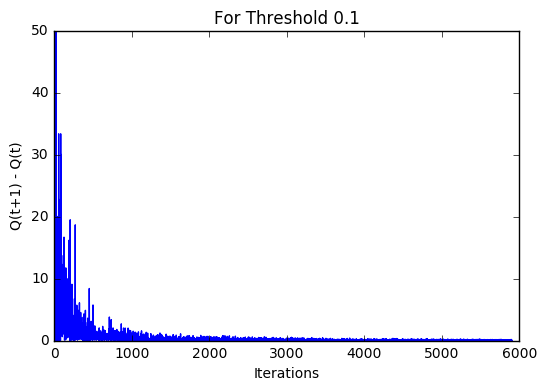

In [45]:
qTable = get_initial_boardState()

gamma = 0.9
plot_data = q_Learning(qTable, gamma)
plot_graph(plot_data, 'For Threshold 0.1')